In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img):
    figure = plt.figure(figsize = (10, 12))
    ax = figure.add_subplot(111)
    ax.imshow(img)

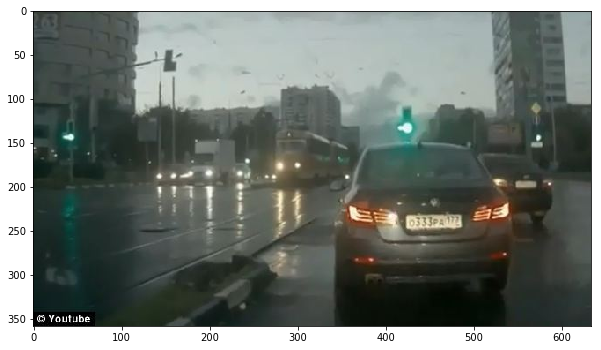

In [3]:
car = cv.imread('DATA/car_plate.jpg')
car = cv.cvtColor(car, cv.COLOR_BGR2RGB)
display(car)

In [4]:
plateDetector = cv.CascadeClassifier('DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')

In [5]:
def detectPlate(img):
    
    img_copy = img.copy()
    
    matches = plateDetector.detectMultiScale(img)
    
    for x, y, w, h in matches:
        cv.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0), 2)
    
    return img_copy

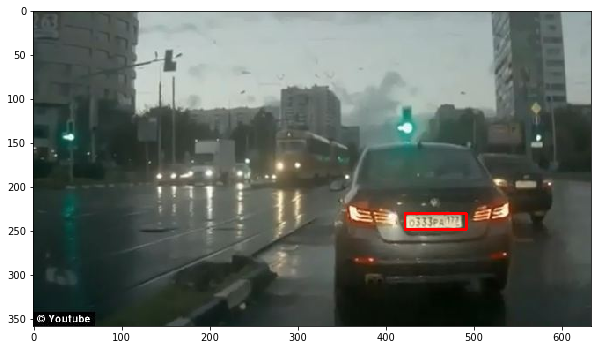

In [6]:
result = detectPlate(car)
display(result)

<h2> Blurring the plates </h2>

In [7]:
def blurPlate(x, y, w, h, img):
    
    roi = img[y:y+h, x:x+w, : ]
    
    roi = cv.blur(roi, (10,10))
    
    img[y:y+h, x:x+w, :] = roi
    
    return img

In [8]:
def detectAndBlurPlate(img):
    
    img_copy = img.copy()
    
    matches = plateDetector.detectMultiScale(img)
    
    for x, y, w, h in matches:
        
        blurPlate(x, y, w, h, img_copy)
    
    return img_copy

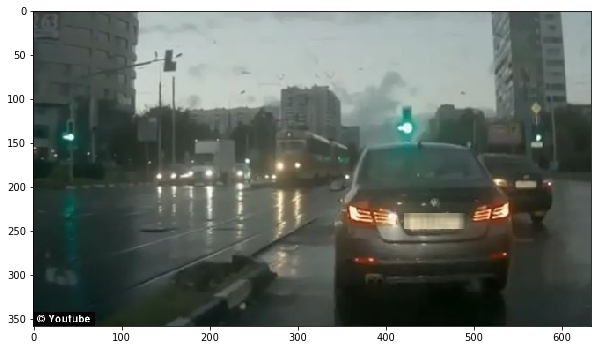

In [9]:
blurred = detectAndBlurPlate(car)
display(blurred)

In [10]:
body = cv.CascadeClassifier('DATA/haarcascades/haarcascade_fullbody.xml')

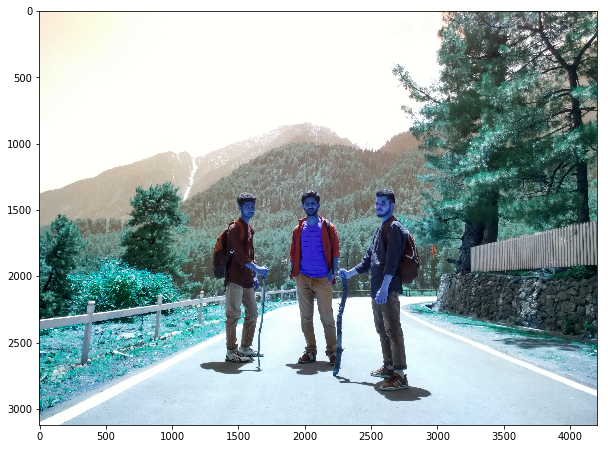

In [44]:
me = cv.imread('E:\\Photos\\College_picnic\\IMG_20170523_130816_HDR.jpg')
display(me)

In [42]:
def detectbody(img):
    
    img_copy = img.copy()
    
    matches = body.detectMultiScale(img, scaleFactor = 1.2, minNeighbors = 3)
    
    for x, y, w, h in matches:
        cv.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0), 10)
    
    return img_copy

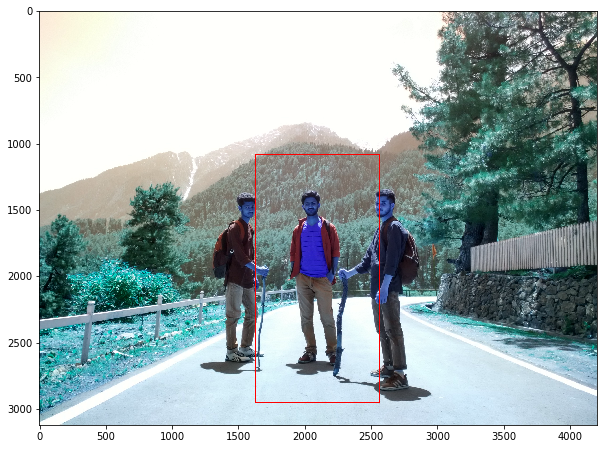

In [45]:
result = detectbody(me)
display(result)